# Задача 1
Таблица содержит "распрямленные" представления изображений лиц людей. Изначально каждое изображение — матрица размера `62x47`, значения которой, предположительно, нормированы к диапазону `[0, 1]` из диапазона `[0, 255]`. Сами значения отвечают за интенсивность пикселя: чем значение больше, тем пиксель светлее. Обратите внимание, из картинки (или, что то же самое, матрицы) размера `62x47` получился вектор длины `2914=62x47`. Колонка `label` отвечает за имя человека, изображенного на картинке.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data/persons_pics_train.csv')

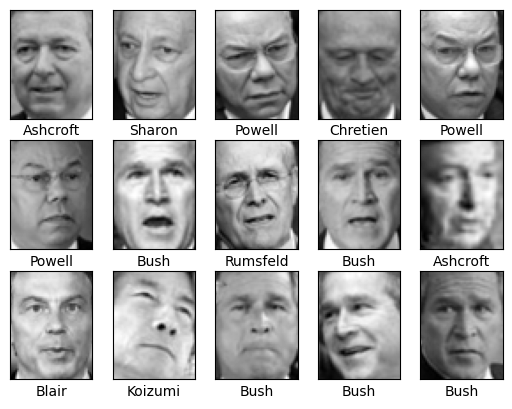

In [2]:
import matplotlib.pyplot as plt


def get_img_by_row(row):
    return row.drop('label').astype(float).to_numpy().reshape(62, 47), row['label']


fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    img, lbl = get_img_by_row(df.iloc[i])
    axi.imshow(img, cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=lbl.split()[-1])
# plt.savefig('persons_pics_img_for_description.png', dpi=300, bbox_inches='tight')

(-0.5, 46.5, 61.5, -0.5)

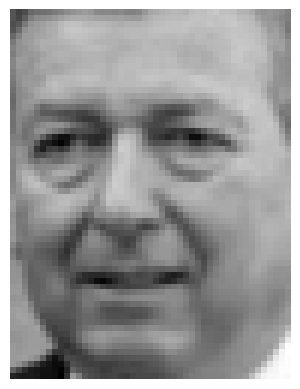

In [3]:
plt.imshow(df.iloc[0].drop('label').astype(float).to_numpy().reshape(62,47), cmap='gray')
plt.axis('off')

**1. Предварительный анализ и немного озорства.**

)Определите число различных людей, фотографии которых содержатся в рассматриваемом наборе данных.*

In [4]:
len(set(df["label"]))

12

Постройте гистограмму распределения объектов по классам и вычислите долю объектов каждого класса.

*Введите долю объектов класса Jacques `Chirac`.*

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'John Ashcroft'),
  Text(1, 0, 'Ariel Sharon'),
  Text(2, 0, 'Colin Powell'),
  Text(3, 0, 'Jean Chretien'),
  Text(4, 0, 'George W Bush'),
  Text(5, 0, 'Donald Rumsfeld'),
  Text(6, 0, 'Tony Blair'),
  Text(7, 0, 'Junichiro Koizumi'),
  Text(8, 0, 'Gerhard Schroeder'),
  Text(9, 0, 'Hugo Chavez'),
  Text(10, 0, 'Serena Williams'),
  Text(11, 0, 'Jacques Chirac')])

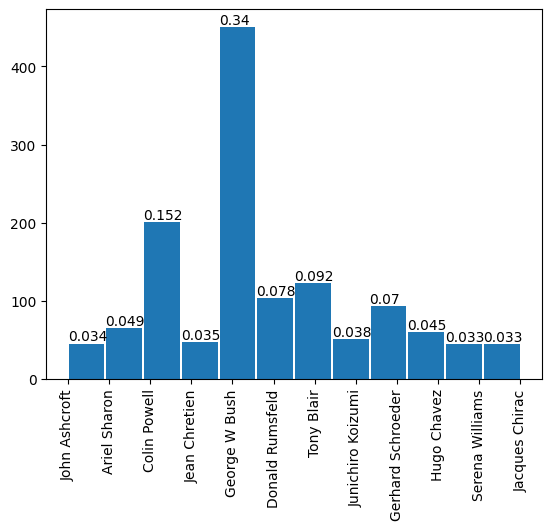

In [5]:
counts, bins, _ = plt.hist(df["label"], bins=len(df["label"].unique()), rwidth=0.95)
for count, x in zip(counts, bins):
    plt.text(x, count, str(round(count / len(df), 3)), va='bottom')
plt.xticks(rotation=90)
 

На основе имеющихся данных поставьте в соответствие каждому человеку один вектор, координаты которого являются средним соответствующих координат всех векторов, отождествленных с этим человеком.

*Введите координату с индексом `0` усредненного вектора, соответствующего `Gerhard Schroeder`.*

In [6]:
labels = set(df["label"])
vectors = {}
for label in labels:
    vectors[label] = df[df['label'] == label].drop("label", axis=1).mean()
print(round(vectors['Gerhard Schroeder'].iloc[0],3))

0.21


*Используя усредненные векторы, постройте изображения всех людей из набора данных. Определите, кто изображен на картинке.*
Введите нужное имя так, как оно написано в колонке label.


Gerhard Schroeder
John Ashcroft
George W Bush
Ariel Sharon
Jean Chretien
Hugo Chavez
Donald Rumsfeld
Junichiro Koizumi
Serena Williams
Tony Blair
Colin Powell
Jacques Chirac


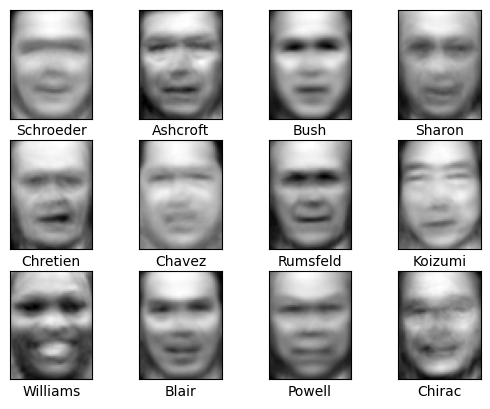

In [7]:
fig, ax = plt.subplots(3, 4)
for axi, label in zip(ax.flat, vectors.keys()):
    print(label)
    img, lbl = vectors[label].astype(float).to_numpy().reshape(62, 47), label
    axi.imshow(img, cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=lbl.split()[-1])

Постройте матрицу схожести объектов на основе их усредненных векторов. В качестве меры схожести используйте косинусное сходство.

In [8]:
import numpy as np

def count_cos_similarity(v1, v2):
    euclid_v1 = np.linalg.norm(v1)
    euclid_v2 = np.linalg.norm(v2)
    nums = sum(v1*v2)
    return nums/(euclid_v1 * euclid_v2)

cos_similarity_dict = {}
for label, vector in vectors.items():
    cos_similarity = []
    for v2 in vectors.values():
        cos_similarity.append(count_cos_similarity(vector, v2))
    cos_similarity_dict[label] = np.array(cos_similarity)
# print(cos_similarity_dict)
cos_similarity_matrix = pd.DataFrame(cos_similarity_dict, index=vectors.keys())
cos_similarity_matrix

,Gerhard Schroeder,John Ashcroft,George W Bush,Ariel Sharon,Jean Chretien,Hugo Chavez,Donald Rumsfeld,Junichiro Koizumi,Serena Williams,Tony Blair,Colin Powell,Jacques Chirac
Gerhard Schroeder,1.000000,0.996986,0.997728,0.993415,0.994118,0.997621,0.996309,0.993774,0.985748,0.998107,0.995470,0.997229
John Ashcroft,0.996986,1.000000,0.997465,0.995131,0.993907,0.994794,0.995308,0.993632,0.987354,0.996908,0.996295,0.996172
George W Bush,0.997728,0.997465,1.000000,0.994814,0.993516,0.996353,0.996645,0.993667,0.985307,0.997331,0.996409,0.996223
Ariel Sharon,0.993415,0.995131,0.994814,1.000000,0.995977,0.989612,0.996752,0.987816,0.987774,0.995362,0.997854,0.993172
Jean Chretien,0.994118,0.993907,0.993516,0.995977,1.000000,0.989890,0.997448,0.986172,0.982785,0.995850,0.996490,0.993350
Hugo Chavez,0.997621,0.994794,0.996353,0.989612,0.989890,1.000000,0.991954,0.993828,0.983244,0.996131,0.992776,0.995185
Donald Rumsfeld,0.996309,0.995308,0.996645,0.996752,0.997448,0.991954,1.000000,0.988584,0.986606,0.997292,0.997700,0.995152
Junichiro Koizumi,0.993774,0.993632,0.993667,0.987816,0.986172,0.993828,0.988584,1.000000,0.975732,0.992306,0.990409,0.994746
Serena Williams,0.985748,0.987354,0.985307,0.987774,0.982785,0.983244,0.986606,0.975732,1.000000,0.987652,0.988370,0.983479
Tony Blair,0.998107,0.996908,0.997331,0.995362,0.995850,0.996131,0.997292,0.992306,0.987652,1.000000,0.997367,0.996284


Введите значение косинусного сходства между парой усредненных векторов `Donald Rumsfeld` и `Serena Williams`.

In [9]:
round(cos_similarity_matrix['Donald Rumsfeld']['Serena Williams'], 3)

0.987

**2. Построение модели.**

**Первое приближение: базовый SVM классификатор с линейным ядром.**

При помощи `train_test_split()` разбейте набор данных на обучающую и тестовую выборки с параметрами `test_size=0.2`, `random_state=5`. Используйте стратификацию по колонке `label`. Обучите модель `SVC()` на тренировочном наборе данных со следующими параметрами: `kernel='linear', random_state=5`. Оцените модель на тестовых данных.

*Вычислите `f1_score(average='weighted')` модели на тестовых данных.*

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score
X_train, X_test, y_train, y_test = train_test_split(df.drop("label", axis=1), df["label"], test_size=0.2, random_state=5, stratify=df['label'])
model = SVC(kernel='linear', random_state=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
round(f1_score(y_test, y_pred, average='weighted'), 3)

0.741

**Подбор гиперпараметров**

Используя `GridSearchCV()`, осуществите подбор гиперпараметров на основе следующих значений:

In [12]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000], 'class_weight': [None, 'balanced'], 'random_state':[5]}]

cv = GridSearchCV(SVC(), tuned_parameters, refit=True, verbose=3)
cv.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=5;, score=0.778 total time=   1.1s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=5;, score=0.764 total time=   1.0s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=5;, score=0.825 total time=   1.0s
[CV 4/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=5;, score=0.802 total time=   0.9s
[CV 5/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=5;, score=0.769 total time=   1.0s
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=5;, score=0.377 total time=   2.1s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=5;, score=0.358 total time=   1.3s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=5;, score=0.373 total time=   1.3s
[CV 4/5] END C=1, class_weight=None, gam

/Users/max/Desktop/University/Магистратура/1 semester/ML/ML_BASE/.venv/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'class_weight': [None, 'balanced'],
                          'gamma': [0.001, 0.0001],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                          'random_state': [5]}],
             verbose=3)

In [13]:
cv.best_params_

{'C': 1000,
 'class_weight': 'balanced',
 'gamma': 0.0001,
 'kernel': 'sigmoid',
 'random_state': 5}

Выполните предсказание для тестовых данных при помощи лучшей полученной модели.

*Вычислите f1_score(average='weighted') модели на тестовых данных.*

In [225]:
model = SVC(**cv.best_params_)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
round(f1_score(y_test, y_pred, average='weighted'), 3)

0.771

**Уменьшение размерности**

Обучите модель `PCA(svd_solver='full')` на тренировочных данных и определите минимальное количество компонент, необходимое для того, чтобы уровень объясненной дисперсии был больше `0.95`.

*Введите требуемое число главных компонент.*

In [226]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='full')
pca.fit(X_train)
n_components = 0
variance = 0
while variance <= 0.95:
    variance += pca.explained_variance_ratio_[n_components]
    n_components += 1
n_components

173

Заново обучите модель `PCA(svd_solver='full')` на тренировочных данных с использованием полученного числа ГК. Примените полученное преобразование для тренировочных и тестовых данных. Для полученных после `PCA` данных аналогично проделанному ранее, то есть используя `GridSearchCV()`, осуществите подбор гиперпараметров из указанных ранее диапазонов. Отдельно обратите внимание на время обучения моделей. Определите следующие параметры лучшей полученной модели (`cv.best_params_`).

In [227]:
pca = PCA(svd_solver='full', n_components=n_components).fit(X_train)
X_train_new = pca.transform(X_train)
X_test_new = pca.transform(X_test)

In [228]:
tuned_parameters = [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000], 'class_weight': [None, 'balanced'], 'random_state':[5]}]

cv = GridSearchCV(SVC(), tuned_parameters, refit=True, verbose=3)
cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=5;, score=0.745 total time=   0.0s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=5;, score=0.750 total time=   0.0s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=5;, score=0.811 total time=   0.0s
[CV 4/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=5;, score=0.764 total time=   0.0s
[CV 5/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=5;, score=0.745 total time=   0.0s
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=5;, score=0.344 total time=   0.0s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=5;, score=0.340 total time=   0.0s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=5;, score=0.340 total time=   0.0s
[CV 4/5] END C=1, class_weight=None, gam

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'class_weight': [None, 'balanced'],
                          'gamma': [0.001, 0.0001],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                          'random_state': [5]}],
             verbose=3)

In [229]:
cv.best_params_

{'C': 1000,
 'class_weight': 'balanced',
 'gamma': 0.0001,
 'kernel': 'rbf',
 'random_state': 5}

Выполните предсказание для тестовых данных при помощи лучшей полученной модели.

*Вычислите `f1_score(average='weighted')` модели на тестовых данных.*

In [230]:
model = SVC(**cv.best_params_)
model.fit(X_train_new, y_train)
y_pred = model.predict(X_test_new)
round(f1_score(y_test, y_pred, average='weighted'), 3)

0.755

# Задача 2
Используя весь датасет из предыдущего задания как обучающий, выполните предсказания для следующего набора данных. Для успешного выполнения задания необходимо, чтобы ваш результат превысил пороговое значение, равное `0.824`. В качестве метрики используется `f1_score(average='weighted')`.

In [232]:
X_train = pd.read_csv('data/persons_pics_train.csv')
y_train = X_train['label']
X_train.drop('label', axis=1, inplace=True)

X_test = pd.read_csv('data/persons_pics_reserved.csv')

In [233]:
pca = PCA(svd_solver='full')
pca.fit(X_train)
n_components = 0
variance = 0
while variance <= 0.95:
    variance += pca.explained_variance_ratio_[n_components]
    n_components += 1
n_components

181

In [234]:
pca = PCA(svd_solver='full', n_components=n_components).fit(X_train)
X_train_new = pca.transform(X_train)
X_test_new = pca.transform(X_test)

In [235]:
tuned_parameters = [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': [1e-3, 1e-4, 'auto'],
                     'C': [1, 10, 100, 1000], 'class_weight': [None, 'balanced'], 'random_state': [5]}]
cv = GridSearchCV(SVC(), tuned_parameters, refit=True, verbose=3)
cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=5;, score=0.808 total time=   0.0s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=5;, score=0.781 total time=   0.0s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=5;, score=0.796 total time=   0.0s
[CV 4/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=5;, score=0.762 total time=   0.0s
[CV 5/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=5;, score=0.762 total time=   0.0s
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=5;, score=0.338 total time=   0.0s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=5;, score=0.340 total time=   0.0s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=5;, score=0.340 total time=   0.0s
[CV 4/5] END C=1, class_weight=None, gam

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'class_weight': [None, 'balanced'],
                          'gamma': [0.001, 0.0001, 'auto'],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                          'random_state': [5]}],
             verbose=3)

In [236]:
print(cv.best_params_)

{'C': 100, 'class_weight': None, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 5}


In [237]:
model = SVC(**cv.best_params_)
model.fit(X_train_new, y_train)
y_pred = model.predict(X_train_new)
round(f1_score(y_train, y_pred, average='weighted'), 3)

1.0

In [238]:
y_pred = model.predict(X_test_new)
list(y_pred)

['George W Bush',
 'Jean Chretien',
 'Tony Blair',
 'Jacques Chirac',
 'Tony Blair',
 'Colin Powell',
 'Donald Rumsfeld',
 'George W Bush',
 'Tony Blair',
 'Gerhard Schroeder',
 'Tony Blair',
 'Hugo Chavez',
 'Tony Blair',
 'Hugo Chavez',
 'Colin Powell',
 'George W Bush',
 'Ariel Sharon',
 'Colin Powell',
 'Colin Powell',
 'Gerhard Schroeder',
 'Ariel Sharon',
 'George W Bush',
 'Colin Powell',
 'George W Bush',
 'George W Bush',
 'Donald Rumsfeld',
 'Donald Rumsfeld',
 'Tony Blair',
 'Serena Williams',
 'Jean Chretien',
 'George W Bush',
 'George W Bush',
 'George W Bush',
 'George W Bush',
 'George W Bush',
 'Donald Rumsfeld',
 'Donald Rumsfeld',
 'Colin Powell',
 'George W Bush',
 'Gerhard Schroeder',
 'Colin Powell',
 'Donald Rumsfeld',
 'Gerhard Schroeder',
 'George W Bush',
 'Tony Blair',
 'George W Bush',
 'George W Bush',
 'Gerhard Schroeder',
 'Colin Powell',
 'Tony Blair',
 'Serena Williams',
 'Jean Chretien',
 'Tony Blair',
 'George W Bush',
 'Colin Powell',
 'George W Bush